In [1]:
import mkvdecoder

import numpy as np

# Shakespeare in color 

In [2]:
with open('text_data/all_shakespere.txt', 'r') as myfile:
    shakespeare = ''
    for line in myfile:
        shakespeare+=line

In [3]:
import matplotlib.pyplot as plt

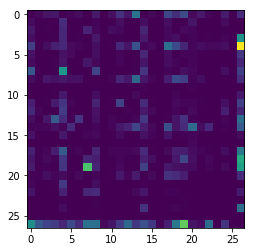

In [4]:
shakespeare_matrix = mkvdecoder.text_to_matrix(shakespeare, True)
plt.imshow(shakespeare_matrix)
plt.show()

In [5]:
np.min(shakespeare_matrix)

1e-19

#  fitness graph (main)

QA

               QAU PURVZW GXYQ VD TSZO AUZYB QAU PSJQA

               QAU QASYW GXYQ VD TSZO AU
CS

               CSD HDUENG MYRC EO KWNV SDNRI CSD HWFCS

               CSD CSWRG MYRC EO KWNV SD
MS

               MSD FDUHCE KYRM HO IWCV SDCRP MSD FWLMS

               MSD MSWRE KYRM HO IWCV SD
FS

               FSH MHULCG JYWF LO KBCV SHCWP FSH MBEFS

               FSH FSBWG JYWF LO KBCV SH
LS

               LSD FDUICG EYBL IO MWCV SDCBH LSD FWKLS

               LSD LSWBG EYBL IO MWCV SD
CS

               CST ETUKIX JYWC KO NDIB STIWG CST EDFCS

               CST CSDWX JYWC KO NDIB ST
FS

               FSB NBUCKI LYWF CO MDKT SBKWP FSB NDHFS

               FSB FSDWI LYWF CO MDKT SB
IS

               ISD LDUKFG RYBI KO NWFV SDFBE ISD LWCIS

               ISD ISWBG RYBI KO NWFV SD
NS

               NSD HDUECG IYRN EO LWCV SDCRP NSD HWKNS

               NSD NSWRG IYRN EO LWCV SD
IT

               ITS KSUNCG FYWI NO LDCX TSCWP ITS KDMIT

               ITS ITDWG FYWI N

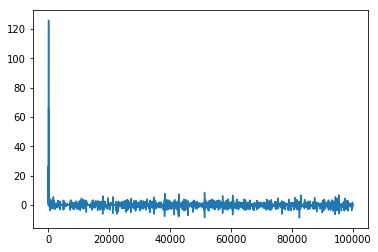

In [8]:
cipher = mkvdecoder.random_cipher()
cipher = np.arange(26)

inverted_true_cipher = mkvdecoder.random_cipher()
ref_matr = shakespeare_matrix

#text = ('lets see if this text can be deciphered efficiently by our algorithm \n'
#        +'the quick brown fox jumps over the lazy dog'
#       )
text = shakespeare[1500:1600]

enc_text = mkvdecoder.decode_text(text, inverted_true_cipher)
#enc_text = text
enc_matr = mkvdecoder.text_to_matrix(enc_text, False)

fitness_vec=[]

for j in range(100000):
    oldcipher=cipher
    cipher = mkvdecoder.metropolis_step(ref_matr, enc_matr, cipher)
    fitness_vec+=[ mkvdecoder.fitness_ratio(ref_matr, mkvdecoder.decode_matrix(enc_matr,cipher), 
                                            mkvdecoder.decode_matrix(enc_matr,oldcipher) )]
    if j%5000==0: print(mkvdecoder.decode_text(enc_text, cipher))
plt.plot(np.log(fitness_vec))
plt.show()

In [33]:
cipher

array([14,  6,  5,  7,  4,  0,  9, 15, 17, 22, 25,  1, 18, 11, 12, 19, 23,
       16,  3,  2, 21, 20, 10,  8, 24, 13])

In [8]:
mkvdecoder.decode_text(enc_text, cipher)

'TH\n\n               THE GECIRD LONT IV UARY HERNJ THE GAMTH\n\n               THE THAND LONT IV UARY HE'

In [14]:
len(shakespeare)

5684704

In [17]:
counter = 0 
for i in range(1,len(shakespeare)-1):
    if shakespeare[i]=='a' and not(shakespeare[i-1].isalpha()) and not(shakespeare[i+1].isalpha()):
        counter+=1
counter/len(shakespeare)

0.002455185001716888

In [22]:
counter = 0 
for i in range(1,len(shakespeare)-1):
    if shakespeare[i]=='s' and not(shakespeare[i+1].isalpha()):
        counter+=1
counter/len(shakespeare)

0.018364544574352507

AttributeError: module 'numpy' has no attribute 'factorial'